<a href="https://colab.research.google.com/github/Rahul30032/Neural_Nets/blob/master/LSTM_AIRLINE_PROBLEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip3 install -U scikit-learn 

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.3)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
np.random.seed(7)

In [77]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url,usecols=[1])

df.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [0]:
dataset= df.values
dataset=dataset.astype('float32')

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [49]:
np.shape(dataset)

(144, 1)

In [50]:
dataset[1]

array([0.02702703], dtype=float32)

In [51]:
dataset[1:3]

array([[0.02702703],
       [0.05405405]], dtype=float32)

In [52]:
dataset[1:3,0]

array([0.02702703, 0.05405405], dtype=float32)

In [54]:
print (len(dataset))

144


In [65]:
# split into train and test sets
from sklearn.model_selection import train_test_split
dataset_train,dataset_test = train_test_split(dataset,test_size=0.33,random_state = 50)

print(len(dataset_train), len(dataset_test))


96 48


In [68]:
type(dataset_test)

numpy.ndarray

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
    
		a = dataset[i:(i+look_back)]
    
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)


In [0]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(dataset_train, look_back)
testX, testY = create_dataset(dataset_test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

In [85]:
trainY.shape

(94, 1)

In [91]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 21591053064749.24 RMSE
Test Score: 42953187184.23 RMSE


In [0]:
# shift train predictions for plotting 
trainPredictPlot = np.empty_like(dataset) #an empty array of simlar shape and type is made
trainPredictPlot[:, :] = np.nan #filled with NaN values
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict #dimension specified for which trainpredict valuse will fill the nan array
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict # in x axis of sample train and split are divided in 2:1 ratio and this 'len(trainPredict)+(look_back*2)+1:len(dataset)-1,' is making sure that x-axis of test data is after train data ends keeping in mind the look back and shall end with last term of dataset(dataset-1)
#len(trainPredict)+(look_back*2)+1:len(dataset)-1,

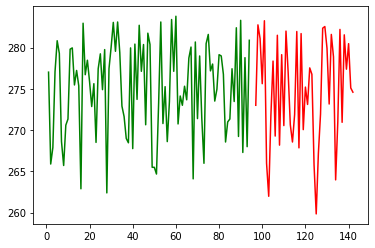

In [113]:
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset),'b-')
plt.plot(trainPredictPlot,'g-')
plt.plot(testPredictPlot,'r-')
plt.show()